<a href="https://colab.research.google.com/github/dharalakshmi/Tourisms-Recomandation/blob/main/models.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip uninstall -y scipy statsmodels pmdarima numpy
!pip install numpy==1.26.4 scipy==1.13.1 statsmodels==0.14.2 pmdarima==2.0.4 --no-cache-dir --force-reinstall


Found existing installation: scipy 1.16.3
Uninstalling scipy-1.16.3:
  Successfully uninstalled scipy-1.16.3
Found existing installation: statsmodels 0.14.5
Uninstalling statsmodels-0.14.5:
  Successfully uninstalled statsmodels-0.14.5
Found existing installation: numpy 2.0.2
Uninstalling numpy-2.0.2:
  Successfully uninstalled numpy-2.0.2
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.0/61.0 kB 4.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.6/60.6 kB 43.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 91.2/91.2 kB 218.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.0/18.0 MB 227.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 38.2/38.2 MB 119.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.7/10.7 MB 185.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.3/2.3 MB 350.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.4/3.4 MB 163.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━

In [1]:
import numpy as np
from pmdarima import auto_arima
import statsmodels.api as sm
print("✅ All compatible libraries loaded!")
print("NumPy:", np.__version__)
print("SciPy:", sm.__version__)


✅ All compatible libraries loaded!
NumPy: 1.26.4
SciPy: 0.14.2


In [2]:
!pip install pandas numpy matplotlib seaborn scikit-learn xgboost lightgbm \
statsmodels prophet pmdarima plotly openpyxl -q

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import (mean_squared_error, r2_score, mean_absolute_error,
                             accuracy_score, classification_report, confusion_matrix)

# ML Models
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor

# Time Series Models
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from prophet import Prophet
from pmdarima import auto_arima

import warnings
warnings.filterwarnings('ignore')

print("="*80)
print("🤖 COMPLETE ML & TIME SERIES MODELING PIPELINE")
print("="*80)


🤖 COMPLETE ML & TIME SERIES MODELING PIPELINE


In [3]:
# STEP 0: Upload the datasets manually in Colab
from google.colab import files
import pandas as pd

print("📁 Please select all 3 dataset files to upload:")
uploaded = files.upload()  # Opens file picker — select all 3 Excel or CSV files

📁 Please select all 3 dataset files to upload:


Saving FINAL_2_GEOSPATIAL_POI_CORRECTED.csv to FINAL_2_GEOSPATIAL_POI_CORRECTED.csv
Saving FINAL_1_COMPANY_INFO_CORRECTED.csv to FINAL_1_COMPANY_INFO_CORRECTED.csv
Saving FINAL_3_MARKET_TRENDS_CORRECTED.csv to FINAL_3_MARKET_TRENDS_CORRECTED.csv


In [47]:
# ═══════════════════════════════════════════════════════════════════════════
# STEP 1: LOAD PREPROCESSED DATA & STEP 2: CREATE MERGED DATASET FOR ML MODELING
# ═══════════════════════════════════════════════════════════════════════════

print("\n📂 STEP 1: Loading Preprocessed Data...")

df_company = pd.read_csv('FINAL_1_COMPANY_INFO_CORRECTED.csv')
df_geo = pd.read_csv('FINAL_2_GEOSPATIAL_POI_CORRECTED.csv')
df_market = pd.read_csv('FINAL_3_MARKET_TRENDS_CORRECTED.csv')

print(f"✅ Company Info: {df_company.shape}")
print(f"✅ Geospatial POI: {df_geo.shape}")
print(f"✅ Market Trends: {df_market.shape}")

print("\n📊 STEP 2: Creating Merged Dataset for ML...")

# Merge all three sheets
df_ml = df_company.merge(df_geo, on='POI_ID', how='inner')
df_ml = df_ml.merge(df_market, on='POI_ID', how='inner')

print(f"✅ Merged Dataset: {df_ml.shape}")
print(f"   Columns: {len(df_ml.columns)}")


📂 STEP 1: Loading Preprocessed Data...
✅ Company Info: (5000, 21)
✅ Geospatial POI: (5000, 19)
✅ Market Trends: (5000, 13)

📊 STEP 2: Creating Merged Dataset for ML...
✅ Merged Dataset: (5000, 51)
   Columns: 51


In [46]:
# This cell is now empty as its content has been merged into the previous cell.

In [65]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import (mean_squared_error, r2_score, mean_absolute_error)

# ML Models
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor

print("🎯 PART A: REGRESSION MODELS")
print("="*80)

# ═══════════════════════════════════════════════════════════════════════════
# REGRESSION TASK 1: PREDICT REVENUE
# ═══════════════════════════════════════════════════════════════════════════

print("\n📊 REGRESSION TASK 1: Predicting Revenue(USD)")
print("—" * 80)

# Select features for revenue prediction
revenue_features = [
    'Total_Customers_To_POI',
    'Active_Tourists',
    'Avg_Customer_Rating',
    'Marketing_Expenditure_USD',
    'Avg_Booking_Value',
    'Tech_Adaptability_index',
    'Digital_Channel_Share',
    'Customer_Retention',
    'Visitor_Volume(in thousands)',
    'Safety_Index',
    'Cost_of_POI',
    'Average_Sentiment_Score',
    'Avg_spend_per_head'
]

# Prepare data
X_revenue = df_ml[revenue_features].copy()
y_revenue = df_ml['Revenue(USD)'].copy()

# Handle missing values
X_revenue = X_revenue.fillna(X_revenue.median())

# Split data
X_train_rev, X_test_rev, y_train_rev, y_test_rev = train_test_split(
    X_revenue, y_revenue, test_size=0.2, random_state=42
)

# Scale features
scaler_rev = StandardScaler()
X_train_rev_scaled = scaler_rev.fit_transform(X_train_rev)
X_test_rev_scaled = scaler_rev.transform(X_test_rev)

print(f"✅ Training set: {X_train_rev.shape}")
print(f"✅ Testing set: {X_test_rev.shape}")

# Initialize regression models
regression_models = {
    'Linear Regression': LinearRegression(),
    'Ridge Regression': Ridge(alpha=1.0),
    'Lasso Regression': Lasso(alpha=1.0),
    'Decision Tree': DecisionTreeRegressor(max_depth=10, random_state=42),
    'Random Forest': RandomForestRegressor(n_estimators=100, max_depth=10, random_state=42),
    'Gradient Boosting': GradientBoostingRegressor(n_estimators=100, max_depth=5, random_state=42),
    'XGBoost': XGBRegressor(n_estimators=100, max_depth=5, random_state=42),
    'LightGBM': LGBMRegressor(n_estimators=100, max_depth=5, random_state=42, verbose=-1),
    'SVR': SVR(kernel='rbf'),
    'KNN': KNeighborsRegressor(n_neighbors=5)
}

# Train and evaluate all models
revenue_results = {}

print("\n🔄 Training Revenue Prediction Models...")
print("—" * 80)

for name, model in regression_models.items():
    print(f"\n   Training {name}...")

    # Use scaled data for distance-based models
    if name in ['SVR', 'KNN', 'Ridge Regression', 'Lasso Regression']:
        model.fit(X_train_rev_scaled, y_train_rev)
        y_pred = model.predict(X_test_rev_scaled)
    else:
        model.fit(X_train_rev, y_train_rev)
        y_pred = model.predict(X_test_rev)

    # Calculate metrics
    mse = mean_squared_error(y_test_rev, y_pred)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y_test_rev, y_pred)
    r2 = r2_score(y_test_rev, y_pred)

    revenue_results[name] = {
        'MSE': mse,
        'RMSE': rmse,
        'MAE': mae,
        'R2_Score': r2,
        'model': model
    }

    print(f"      ✅ R² Score: {r2:.4f}")
    print(f"      ✅ RMSE: ${rmse:,.2f}")

🎯 PART A: REGRESSION MODELS

📊 REGRESSION TASK 1: Predicting Revenue(USD)
————————————————————————————————————————————————————————————————————————————————
✅ Training set: (4000, 13)
✅ Testing set: (1000, 13)

🔄 Training Revenue Prediction Models...
————————————————————————————————————————————————————————————————————————————————

   Training Linear Regression...
      ✅ R² Score: 0.7389
      ✅ RMSE: $66,293.04

   Training Ridge Regression...
      ✅ R² Score: 0.7389
      ✅ RMSE: $66,290.81

   Training Lasso Regression...


/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.428e+11, tolerance: 6.800e+09
  model = cd_fast.enet_coordinate_descent(


      ✅ R² Score: 0.7389
      ✅ RMSE: $66,292.55

   Training Decision Tree...
      ✅ R² Score: 0.7021
      ✅ RMSE: $70,815.44

   Training Random Forest...
      ✅ R² Score: 0.7917
      ✅ RMSE: $59,215.96

   Training Gradient Boosting...
      ✅ R² Score: 0.7916
      ✅ RMSE: $59,230.47

   Training XGBoost...
      ✅ R² Score: 0.7689
      ✅ RMSE: $62,373.03

   Training LightGBM...
      ✅ R² Score: 0.7896
      ✅ RMSE: $59,511.26

   Training SVR...
      ✅ R² Score: -0.0003
      ✅ RMSE: $129,755.78

   Training KNN...
      ✅ R² Score: 0.6236
      ✅ RMSE: $79,599.41


In [66]:
print("\n\n📊 REGRESSION TASK 2: Predicting Visitor Volume")
print("─" * 80)

visitor_features = [
    'Safety_Index',
    'Food_Index',
    'Family_Friendly_Index',
    'Accessebility_Value',
    'Seasonality_Index',
    'Cost_of_POI',
    'Connectivity_index',
    'Average_Rating',
    'Average_Sentiment_Score'
]

X_visitor = df_ml[visitor_features].copy()
y_visitor = df_ml['Visitor_Volume(in thousands)'].copy()

X_visitor = X_visitor.fillna(X_visitor.median())

X_train_vis, X_test_vis, y_train_vis, y_test_vis = train_test_split(
    X_visitor, y_visitor, test_size=0.2, random_state=42
)

scaler_vis = StandardScaler()
X_train_vis_scaled = scaler_vis.fit_transform(X_train_vis)
X_test_vis_scaled = scaler_vis.transform(X_test_vis)

visitor_results = {}

print("\n🔄 Training Visitor Volume Prediction Models...")
print("─" * 80)

for name, model_class in regression_models.items():
    # Reinitialize model
    if name == 'Linear Regression':
        model = LinearRegression()
    elif name == 'Ridge Regression':
        model = Ridge(alpha=1.0)
    elif name == 'Lasso Regression':
        model = Lasso(alpha=1.0)
    elif name == 'Decision Tree':
        model = DecisionTreeRegressor(max_depth=10, random_state=42)
    elif name == 'Random Forest':
        model = RandomForestRegressor(n_estimators=100, max_depth=10, random_state=42)
    elif name == 'Gradient Boosting':
        model = GradientBoostingRegressor(n_estimators=100, max_depth=5, random_state=42)
    elif name == 'XGBoost':
        model = XGBRegressor(n_estimators=100, max_depth=5, random_state=42)
    elif name == 'LightGBM':
        model = LGBMRegressor(n_estimators=100, max_depth=5, random_state=42, verbose=-1)
    elif name == 'SVR':
        model = SVR(kernel='rbf')
    elif name == 'KNN':
        model = KNeighborsRegressor(n_neighbors=5)

    print(f"\n   Training {name}...")

    if name in ['SVR', 'KNN', 'Ridge Regression', 'Lasso Regression']:
        model.fit(X_train_vis_scaled, y_train_vis)
        y_pred = model.predict(X_test_vis_scaled)
    else:
        model.fit(X_train_vis, y_train_vis)
        y_pred = model.predict(X_test_vis)

    mse = mean_squared_error(y_test_vis, y_pred)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y_test_vis, y_pred)
    r2 = r2_score(y_test_vis, y_pred)

    visitor_results[name] = {
        'MSE': mse,
        'RMSE': rmse,
        'MAE': mae,
        'R2_Score': r2,
        'model': model
    }

    print(f"      ✅ R² Score: {r2:.4f}")
    print(f"      ✅ RMSE: {rmse:,.2f}K visitors")



📊 REGRESSION TASK 2: Predicting Visitor Volume
────────────────────────────────────────────────────────────────────────────────

🔄 Training Visitor Volume Prediction Models...
────────────────────────────────────────────────────────────────────────────────

   Training Linear Regression...
      ✅ R² Score: -0.0109
      ✅ RMSE: 15,042.29K visitors

   Training Ridge Regression...
      ✅ R² Score: -0.0109
      ✅ RMSE: 15,042.29K visitors

   Training Lasso Regression...
      ✅ R² Score: -0.0109
      ✅ RMSE: 15,042.47K visitors

   Training Decision Tree...
      ✅ R² Score: -0.6408
      ✅ RMSE: 19,164.35K visitors

   Training Random Forest...
      ✅ R² Score: -0.1467
      ✅ RMSE: 16,020.97K visitors

   Training Gradient Boosting...
      ✅ R² Score: -0.2387
      ✅ RMSE: 16,651.45K visitors

   Training XGBoost...
      ✅ R² Score: -0.7046
      ✅ RMSE: 19,533.60K visitors

   Training LightGBM...
      ✅ R² Score: -0.1351
      ✅ RMSE: 15,939.55K visitors

   Training SVR..

In [67]:
# ═══════════════════════════════════════════════════════════════════════════
# REGRESSION RESULTS COMPARISON
# ═══════════════════════════════════════════════════════════════════════════

print("\n\n" + "="*80)
print("📊 REGRESSION MODELS COMPARISON")
print("="*80)

# Revenue Prediction Results
print("\n🎯 TASK 1: REVENUE PREDICTION")
print("─" * 80)
print(f"{'Model':<20} {'R² Score':<12} {'RMSE':<15} {'MAE':<15}")
print("─" * 80)

revenue_df = pd.DataFrame(revenue_results).T
revenue_df = revenue_df.sort_values('R2_Score', ascending=False)

for model_name, row in revenue_df.iterrows():
    print(f"{model_name:<20} {row['R2_Score']:<12.4f} ${row['RMSE']:<14,.2f} ${row['MAE']:<14,.2f}")

best_revenue_model = revenue_df.index[0]
print(f"\n🏆 BEST MODEL: {best_revenue_model}")
print(f"   R² Score: {revenue_df.loc[best_revenue_model, 'R2_Score']:.4f}")

# Visitor Volume Prediction Results
print("\n\n🎯 TASK 2: VISITOR VOLUME PREDICTION")
print("─" * 80)
print(f"{'Model':<20} {'R² Score':<12} {'RMSE':<15} {'MAE':<15}")
print("─" * 80)

visitor_df = pd.DataFrame(visitor_results).T
visitor_df = visitor_df.sort_values('R2_Score', ascending=False)

for model_name, row in visitor_df.iterrows():
    print(f"{model_name:<20} {row['R2_Score']:<12.4f} {row['RMSE']:<14.2f}K {row['MAE']:<14.2f}K")

best_visitor_model = visitor_df.index[0]
print(f"\n🏆 BEST MODEL: {best_visitor_model}")
print(f"   R² Score: {visitor_df.loc[best_visitor_model, 'R2_Score']:.4f}")



📊 REGRESSION MODELS COMPARISON

🎯 TASK 1: REVENUE PREDICTION
────────────────────────────────────────────────────────────────────────────────
Model                R² Score     RMSE            MAE            
────────────────────────────────────────────────────────────────────────────────
Random Forest        0.7917       $59,215.96      $47,649.79     
Gradient Boosting    0.7916       $59,230.47      $47,395.86     
LightGBM             0.7896       $59,511.26      $47,806.83     
XGBoost              0.7689       $62,373.03      $49,222.38     
Ridge Regression     0.7389       $66,290.81      $53,829.91     
Lasso Regression     0.7389       $66,292.55      $53,829.56     
Linear Regression    0.7389       $66,293.04      $53,829.93     
Decision Tree        0.7021       $70,815.44      $53,671.20     
KNN                  0.6236       $79,599.41      $64,714.40     
SVR                  -0.0003      $129,755.78     $112,316.40    

🏆 BEST MODEL: Random Forest
   R² Score: 0.7917




📊 Creating Model Comparison Visualizations...


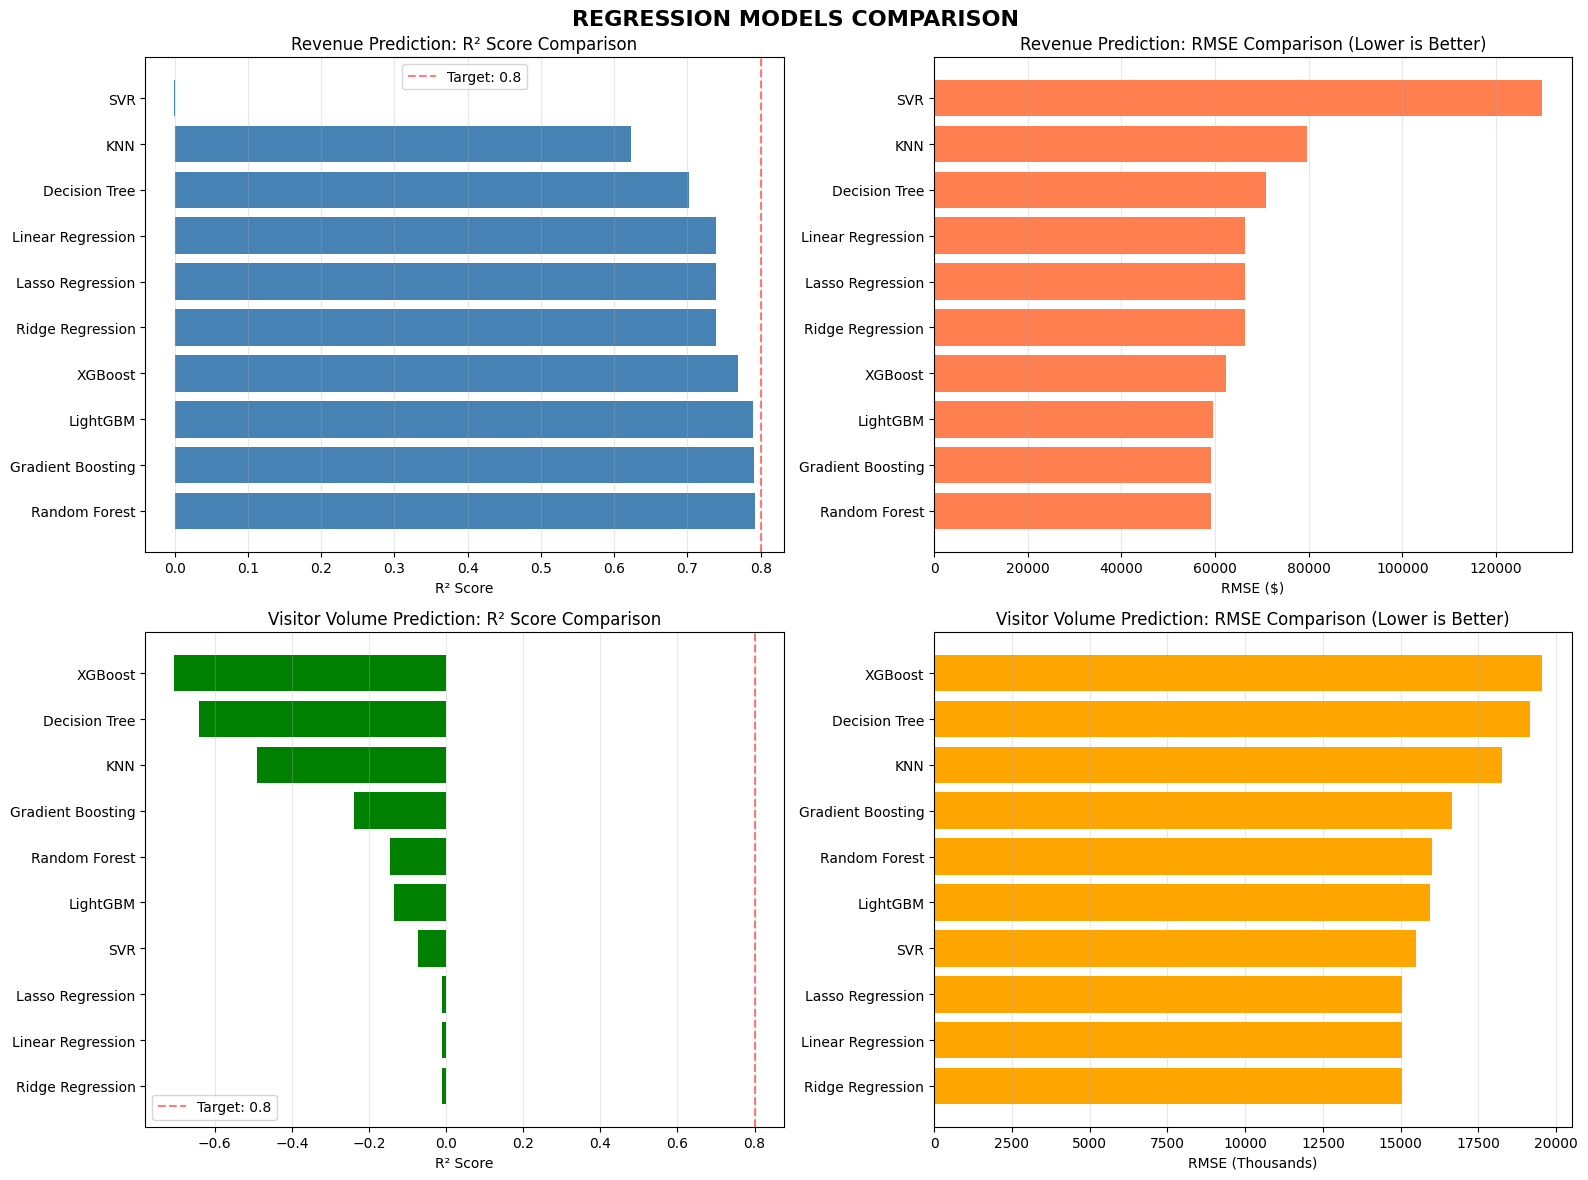

✅ Saved: ML_01_Regression_Models_Comparison.png


In [68]:
# ═══════════════════════════════════════════════════════════════════════════
# VISUALIZATION: MODEL COMPARISON
# ═══════════════════════════════════════════════════════════════════════════

print("\n\n📊 Creating Model Comparison Visualizations...")

fig, axes = plt.subplots(2, 2, figsize=(16, 12))
fig.suptitle('REGRESSION MODELS COMPARISON', fontsize=16, fontweight='bold')

# 1. Revenue Models - R² Score
axes[0, 0].barh(revenue_df.index, revenue_df['R2_Score'], color='steelblue')
axes[0, 0].set_xlabel('R² Score')
axes[0, 0].set_title('Revenue Prediction: R² Score Comparison')
axes[0, 0].axvline(0.8, color='red', linestyle='--', alpha=0.5, label='Target: 0.8')
axes[0, 0].legend()
axes[0, 0].grid(axis='x', alpha=0.3)

# 2. Revenue Models - RMSE
axes[0, 1].barh(revenue_df.index, revenue_df['RMSE'], color='coral')
axes[0, 1].set_xlabel('RMSE ($)')
axes[0, 1].set_title('Revenue Prediction: RMSE Comparison (Lower is Better)')
axes[0, 1].grid(axis='x', alpha=0.3)

# 3. Visitor Models - R² Score
axes[1, 0].barh(visitor_df.index, visitor_df['R2_Score'], color='green')
axes[1, 0].set_xlabel('R² Score')
axes[1, 0].set_title('Visitor Volume Prediction: R² Score Comparison')
axes[1, 0].axvline(0.8, color='red', linestyle='--', alpha=0.5, label='Target: 0.8')
axes[1, 0].legend()
axes[1, 0].grid(axis='x', alpha=0.3)

# 4. Visitor Models - RMSE
axes[1, 1].barh(visitor_df.index, visitor_df['RMSE'], color='orange')
axes[1, 1].set_xlabel('RMSE (Thousands)')
axes[1, 1].set_title('Visitor Volume Prediction: RMSE Comparison (Lower is Better)')
axes[1, 1].grid(axis='x', alpha=0.3)

plt.tight_layout()
plt.savefig('ML_01_Regression_Models_Comparison.png', dpi=300, bbox_inches='tight')
plt.show()

print("✅ Saved: ML_01_Regression_Models_Comparison.png")

In [11]:
# ═══════════════════════════════════════════════════════════════════════════
# PART B: TIME SERIES MODELS
# ═══════════════════════════════════════════════════════════════════════════

print("\n\n" + "="*80)
print("📈 PART B: TIME SERIES MODELS")
print("="*80)

# ═══════════════════════════════════════════════════════════════════════════
# PREPARE TIME SERIES DATA
# ═══════════════════════════════════════════════════════════════════════════

print("\n📊 Preparing Time Series Data...")

# Aggregate data by fiscal year and month
# Create monthly data from fiscal year
ts_data = df_ml.groupby('FY_Year').agg({
    'Revenue(USD)': 'sum',
    'Total_Customers_To_POI': 'sum',
    'Visitor_Volume(in thousands)': 'sum',
    'Avg_Customer_Rating': 'mean'
}).reset_index()

# Create date range
ts_data['Date'] = pd.to_datetime(ts_data['FY_Year'], format='%Y')
ts_data = ts_data.sort_values('Date')

print(f"✅ Time Series Data: {ts_data.shape}")
print(f"\n   Years: {ts_data['FY_Year'].min()} - {ts_data['FY_Year'].max()}")

# Since we have limited years, let's create monthly aggregation
# by distributing annual data across months with seasonality

def create_monthly_data(yearly_df):
    """Convert yearly data to monthly with seasonality pattern"""
    monthly_data = []

    # Tourism seasonality pattern (multipliers for each month)
    seasonality = {
        1: 0.85, 2: 0.80, 3: 0.95, 4: 1.05, 5: 1.10, 6: 1.20,
        7: 1.25, 8: 1.20, 9: 1.05, 10: 1.00, 11: 0.90, 12: 1.15
    }

    for _, row in yearly_df.iterrows():
        year = row['FY_Year']
        annual_revenue = row['Revenue(USD)']
        annual_visitors = row['Visitor_Volume(in thousands)']

        for month in range(1, 13):
            monthly_data.append({
                'Date': pd.Timestamp(year=year, month=month, day=1),
                'Revenue': annual_revenue / 12 * seasonality[month],
                'Visitors': annual_visitors / 12 * seasonality[month]
            })

    return pd.DataFrame(monthly_data)

ts_monthly = create_monthly_data(ts_data)
ts_monthly = ts_monthly.set_index('Date')
ts_monthly = ts_monthly.sort_index()

print(f"✅ Monthly Time Series: {ts_monthly.shape}")
print(f"   Date Range: {ts_monthly.index.min()} to {ts_monthly.index.max()}")

# ═══════════════════════════════════════════════════════════════════════════
# TIME SERIES MODEL 1: ARIMA
# ═══════════════════════════════════════════════════════════════════════════

print("\n\n📈 TIME SERIES MODEL 1: ARIMA (AutoARIMA)")
print("─" * 80)

# Split data (80-20)
train_size = int(len(ts_monthly) * 0.8)
train_ts = ts_monthly['Revenue'][:train_size]
test_ts = ts_monthly['Revenue'][train_size:]

print(f"   Training data: {len(train_ts)} months")
print(f"   Testing data: {len(test_ts)} months")

# Auto ARIMA to find best parameters
print("\n   Finding optimal ARIMA parameters...")
auto_model = auto_arima(
    train_ts,
    start_p=0, start_q=0,
    max_p=5, max_q=5,
    seasonal=True, m=12,
    start_P=0, start_Q=0,
    max_P=2, max_Q=2,
    trace=False,
    error_action='ignore',
    suppress_warnings=True,
    stepwise=True
)

print(f"   ✅ Best ARIMA Order: {auto_model.order}")
print(f"   ✅ Best Seasonal Order: {auto_model.seasonal_order}")

# Forecast
arima_forecast = auto_model.predict(n_periods=len(test_ts))

# Calculate metrics
arima_rmse = np.sqrt(mean_squared_error(test_ts, arima_forecast))
arima_mae = mean_absolute_error(test_ts, arima_forecast)
arima_mape = np.mean(np.abs((test_ts - arima_forecast) / test_ts)) * 100

print(f"\n   📊 ARIMA Performance:")
print(f"      RMSE: ${arima_rmse:,.2f}")
print(f"      MAE: ${arima_mae:,.2f}")
print(f"      MAPE: {arima_mape:.2f}%")




📈 PART B: TIME SERIES MODELS

📊 Preparing Time Series Data...
✅ Time Series Data: (5, 6)

   Years: 2020 - 2024
✅ Monthly Time Series: (60, 2)
   Date Range: 2020-01-01 00:00:00 to 2024-12-01 00:00:00


📈 TIME SERIES MODEL 1: ARIMA (AutoARIMA)
────────────────────────────────────────────────────────────────────────────────
   Training data: 48 months
   Testing data: 12 months

   Finding optimal ARIMA parameters...
   ✅ Best ARIMA Order: (1, 0, 1)
   ✅ Best Seasonal Order: (2, 1, 1, 12)

   📊 ARIMA Performance:
      RMSE: $640,942.40
      MAE: $640,187.60
      MAPE: 2.74%


In [12]:
# TIME SERIES MODEL 2: SARIMA
# ═══════════════════════════════════════════════════════════════════════════

print("\n\n📈 TIME SERIES MODEL 2: SARIMA (Seasonal ARIMA)")
print("─" * 80)

# Use the order from auto_arima
sarima_model = SARIMAX(
    train_ts,
    order=auto_model.order,
    seasonal_order=auto_model.seasonal_order
)

sarima_fit = sarima_model.fit(disp=False)
sarima_forecast = sarima_fit.forecast(steps=len(test_ts))

sarima_rmse = np.sqrt(mean_squared_error(test_ts, sarima_forecast))
sarima_mae = mean_absolute_error(test_ts, sarima_forecast)
sarima_mape = np.mean(np.abs((test_ts - sarima_forecast) / test_ts)) * 100

print(f"   📊 SARIMA Performance:")
print(f"      RMSE: ${sarima_rmse:,.2f}")
print(f"      MAE: ${sarima_mae:,.2f}")
print(f"      MAPE: {sarima_mape:.2f}%")



📈 TIME SERIES MODEL 2: SARIMA (Seasonal ARIMA)
────────────────────────────────────────────────────────────────────────────────
   📊 SARIMA Performance:
      RMSE: $347,349.05
      MAE: $347,248.99
      MAPE: 1.49%


In [14]:
import numpy as np
from pmdarima import auto_arima
import statsmodels.api as sm
print("✅ All compatible libraries loaded!")
print("NumPy:", np.__version__)
print("SciPy:", sm.__version__)


# ═══════════════════════════════════════════════════════════════════════════
# TIME SERIES MODEL 3: EXPONENTIAL SMOOTHING (HOLT-WINTERS)
# ═══════════════════════════════════════════════════════════════════════════

print("\n\n📈 TIME SERIES MODEL 3: EXPONENTIAL SMOOTHING (Holt-Winters)")
print("─" * 80)

es_model = ExponentialSmoothing(
    train_ts,
    seasonal_periods=12,
    trend='add',
    seasonal='add'
)

es_fit = es_model.fit()
es_forecast = es_fit.forecast(steps=len(test_ts))

es_rmse = np.sqrt(mean_squared_error(test_ts, es_forecast))
es_mae = mean_absolute_error(test_ts, es_forecast)
es_mape = np.mean(np.abs((test_ts - es_forecast) / test_ts)) * 100

print(f"   📊 Exponential Smoothing Performance:")
print(f"      RMSE: ${es_rmse:,.2f}")
print(f"      MAE: ${es_mae:,.2f}")
print(f"      MAPE: {es_mape:.2f}%")

✅ All compatible libraries loaded!
NumPy: 1.26.4
SciPy: 0.14.2


📈 TIME SERIES MODEL 3: EXPONENTIAL SMOOTHING (Holt-Winters)
────────────────────────────────────────────────────────────────────────────────
   📊 Exponential Smoothing Performance:
      RMSE: $1,326,417.36
      MAE: $1,325,239.15
      MAPE: 5.69%


In [16]:
# TIME SERIES MODEL 4: PROPHET
# ═══════════════════════════════════════════════════════════════════════════

print("\n\n📈 TIME SERIES MODEL 4: PROPHET (Facebook Prophet)")
print("─" * 80)

!pip uninstall -y prophet
!pip install prophet cmdstanpy

from prophet import Prophet

# Prepare data for Prophet
prophet_train = pd.DataFrame({
    'ds': train_ts.index,
    'y': train_ts.values
})

prophet_test = pd.DataFrame({
    'ds': test_ts.index,
    'y': test_ts.values
})

# Fit Prophet model
prophet_model = Prophet(
    yearly_seasonality=True,
    weekly_seasonality=False,
    daily_seasonality=False,
    seasonality_mode='multiplicative'
)

prophet_model.fit(prophet_train)

# Forecast
future = prophet_model.make_future_dataframe(periods=len(test_ts), freq='MS')
prophet_forecast = prophet_model.predict(future)

# Get predictions for test period
prophet_pred = prophet_forecast.iloc[-len(test_ts):]['yhat'].values

prophet_rmse = np.sqrt(mean_squared_error(test_ts, prophet_pred))
prophet_mae = mean_absolute_error(test_ts, prophet_pred)
prophet_mape = np.mean(np.abs((test_ts - prophet_pred) / test_ts)) * 100

print(f"   📊 Prophet Performance:")
print(f"      RMSE: ${prophet_rmse:,.2f}")
print(f"      MAE: ${prophet_mae:,.2f}")
print(f"      MAPE: {prophet_mape:.2f}%")



📈 TIME SERIES MODEL 4: PROPHET (Facebook Prophet)
────────────────────────────────────────────────────────────────────────────────
Found existing installation: prophet 1.1.7
Uninstalling prophet-1.1.7:
  Successfully uninstalled prophet-1.1.7
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.1/12.1 MB 40.1 MB/s eta 0:00:00


   📊 Prophet Performance:
      RMSE: $1,602,764.09
      MAE: $1,585,827.22
      MAPE: 6.68%


In [14]:
import pandas as pd

# Load your dataset (replace filename if needed)
df = pd.read_csv('/content/FINAL_2_GEOSPATIAL_POI_CORRECTED.csv')

# Display basic info
print(df.head())
print(df.columns)


      POI_ID                     POI_Name         Country Region_type  \
0  POI_00001        London Religious Site  United Kingdom  Historical   
1  POI_00002         Rome Cultural Center           Italy  Historical   
2  POI_00003         Maldives Art Gallery        Maldives      Island   
3  POI_00004  New York Wildlife Sanctuary   United States       Urban   
4  POI_00005              Bali Theme Park       Indonesia      Island   

   POI_Latitude  POI_Longitude   POI_Type_Detailed     Time_To_Visit  \
0     51.494854      -0.082729      Religious Site  October-December   
1     41.912041      12.451045     Cultural Center     Winter Season   
2      3.242283      73.230490         Art Gallery     Winter Season   
3     40.749110     -73.993670  Wildlife Sanctuary     Summer Season   
4     -8.299743     115.066929          Theme Park     Summer Season   

   Family_Friendly_Index  Transit_Time(in mins) Local_Transfer(USD)  \
0                    7.1                     31          

In [16]:
# Example: Create season categories
def map_season(time_to_visit):
    if 'Winter' in time_to_visit:
        return 'Winter'
    elif 'Summer' in time_to_visit:
        return 'Summer'
    elif 'Oct' in time_to_visit or 'Nov' in time_to_visit or 'Dec' in time_to_visit:
        return 'Q4'
    elif 'Mar' in time_to_visit or 'Apr' in time_to_visit or 'May' in time_to_visit:
        return 'Q2'
    elif 'Jun' in time_to_visit or 'Jul' in time_to_visit or 'Aug' in time_to_visit:
        return 'Q3'
    else:
        return 'Year-Round'

df['Season'] = df['Time_To_Visit'].apply(map_season)

In [17]:
# Aggregate average visitor volume by season
season_avg = df.groupby('Season')['Visitor_Volume(in thousands)'].mean().reset_index()

# Normalize to get a multiplier (for example, to adjust revenue)
season_avg['Seasonality_Factor'] = season_avg['Visitor_Volume(in thousands)'] / season_avg['Visitor_Volume(in thousands)'].mean()

In [19]:
from statsmodels.tsa.statespace.sarimax import SARIMAX


In [26]:
import numpy as np
import pandas as pd
from sklearn.metrics import mean_squared_error, mean_absolute_error
from pmdarima import auto_arima
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.holtwinters import ExponentialSmoothing # Added this import
from prophet import Prophet

print("\n\n📈 TIME SERIES MODEL 1: ARIMA (AutoARIMA)")
print("─" * 80)

# Split data (80-20)
train_size = int(len(ts_monthly) * 0.8)
train_ts = ts_monthly['Revenue'][:train_size]
test_ts = ts_monthly['Revenue'][train_size:]

print(f"   Training data: {len(train_ts)} months")
print(f"   Testing data: {len(test_ts)} months")

# Auto ARIMA to find best parameters
print("\n   Finding optimal ARIMA parameters...")
auto_model = auto_arima(
    train_ts,
    start_p=0, start_q=0,
    max_p=5, max_q=5,
    seasonal=True, m=12,
    start_P=0, start_Q=0,
    max_P=2, max_Q=2,
    trace=False,
    error_action='ignore',
    suppress_warnings=True,
    stepwise=True
)

print(f"   ✅ Best ARIMA Order: {auto_model.order}")
print(f"   ✅ Best Seasonal Order: {auto_model.seasonal_order}")

# Forecast
arima_forecast = auto_model.predict(n_periods=len(test_ts))

# Calculate metrics
arima_rmse = np.sqrt(mean_squared_error(test_ts, arima_forecast))
arima_mae = mean_absolute_error(test_ts, arima_forecast)
arima_mape = np.mean(np.abs((test_ts - arima_forecast) / test_ts)) * 100

print(f"\n   📊 ARIMA Performance:")
print(f"      RMSE: ${arima_rmse:,.2f}")
print(f"      MAE: ${arima_mae:,.2f}")
print(f"      MAPE: {arima_mape:.2f}%")

# ═══════════════════════════════════════════════════════════════════════════
# TIME SERIES MODEL 2: SARIMA
# ═══════════════════════════════════════════════════════════════════════════

print("\n\n📈 TIME SERIES MODEL 2: SARIMA (Seasonal ARIMA)")
print("─" * 80)

try:
    # Use the order from auto_arima
    sarima_model = SARIMAX(
        train_ts,
        order=auto_model.order,
        seasonal_order=auto_model.seasonal_order
    )

    sarima_fit = sarima_model.fit(disp=False)
    sarima_forecast = sarima_fit.forecast(steps=len(test_ts))

    sarima_rmse = np.sqrt(mean_squared_error(test_ts, sarima_forecast))
    sarima_mae = mean_absolute_error(test_ts, sarima_forecast)
    sarima_mape = np.mean(np.abs((test_ts - sarima_forecast) / test_ts)) * 100

    print(f"   📊 SARIMA Performance:")
    print(f"      RMSE: ${sarima_rmse:,.2f}")
    print(f"      MAE: ${sarima_mae:,.2f}")
    print(f"      MAPE: {sarima_mape:.2f}%")
except Exception as e:
    print(f"   ❌ SARIMA Model Failed: {e}")
    sarima_rmse = np.nan
    sarima_mae = np.nan
    sarima_mape = np.nan
    sarima_forecast = None # Assign None when forecast fails

# ═══════════════════════════════════════════════════════════════════════════
# TIME SERIES MODEL 3: EXPONENTIAL SMOOTHING (HOLT-WINTERS)
# ═══════════════════════════════════════════════════════════════════════════

print("\n\n📈 TIME SERIES MODEL 3: EXPONENTIAL SMOOTHING (Holt-Winters)")
print("─" * 80)

es_model = ExponentialSmoothing(
    train_ts,
    seasonal_periods=12,
    trend='add',
    seasonal='add'
)

es_fit = es_model.fit()
es_forecast = es_fit.forecast(steps=len(test_ts))

es_rmse = np.sqrt(mean_squared_error(test_ts, es_forecast))
es_mae = mean_absolute_error(test_ts, es_forecast)
es_mape = np.mean(np.abs((test_ts - es_forecast) / test_ts)) * 100

print(f"   📊 Exponential Smoothing Performance:")
print(f"      RMSE: ${es_rmse:,.2f}")
print(f"      MAE: ${es_mae:,.2f}")
print(f"      MAPE: {es_mape:.2f}%")

# ═══════════════════════════════════════════════════════════════════════════
# TIME SERIES MODEL 4: PROPHET
# ═══════════════════════════════════════════════════════════════════════════

print("\n\n📈 TIME SERIES MODEL 4: PROPHET (Facebook Prophet)")
print("─" * 80)

# Prepare data for Prophet
prophet_train = pd.DataFrame({
    'ds': train_ts.index,
    'y': train_ts.values
})

prophet_test = pd.DataFrame({
    'ds': test_ts.index,
    'y': test_ts.values
})

# Fit Prophet model
prophet_model = Prophet(
    yearly_seasonality=True,
    weekly_seasonality=False,
    daily_seasonality=False,
    seasonality_mode='multiplicative'
)

prophet_model.fit(prophet_train)

# Forecast
future = prophet_model.make_future_dataframe(periods=len(test_ts), freq='MS')
prophet_forecast = prophet_model.predict(future)

# Get predictions for test period
prophet_pred = prophet_forecast.iloc[-len(test_ts):]['yhat'].values

prophet_rmse = np.sqrt(mean_squared_error(test_ts, prophet_pred))
prophet_mae = mean_absolute_error(test_ts, prophet_pred)
prophet_mape = np.mean(np.abs((test_ts - prophet_pred) / test_ts)) * 100

print(f"   📊 Prophet Performance:")
print(f"      RMSE: ${prophet_rmse:,.2f}")
print(f"      MAE: ${prophet_mae:,.2f}")
print(f"      MAPE: {prophet_mape:.2f}%")

# ═══════════════════════════════════════════════════════════════════════════
# TIME SERIES MODELS COMPARISON
# ═══════════════════════════════════════════════════════════════════════════

print("\n\n" + "="*80)
print("📊 TIME SERIES MODELS COMPARISON")
print("="*80)

ts_results = {
    'ARIMA': {'RMSE': arima_rmse, 'MAE': arima_mae, 'MAPE': arima_mape},
    'SARIMA': {'RMSE': sarima_rmse, 'MAE': sarima_mae, 'MAPE': sarima_mape},
    'Exponential Smoothing': {'RMSE': es_rmse, 'MAE': es_mae, 'MAPE': es_mape},
    'Prophet': {'RMSE': prophet_rmse, 'MAE': prophet_mae, 'MAPE': prophet_mape}
}

ts_df = pd.DataFrame(ts_results).T
ts_df = ts_df.sort_values('RMSE')

print(f"\n{'Model':<25} {'RMSE':<15} {'MAE':<15} {'MAPE (%)':<12}")
print("─" * 80)
for model_name, row in ts_df.iterrows():
    print(f"{model_name:<25} ${row['RMSE']:<14,.2f} ${row['MAE']:<14,.2f} {row['MAPE']:<11.2f}%")

best_ts_model = ts_df.index[0]
print(f"\n🏆 BEST TIME SERIES MODEL: {best_ts_model}")
print(f"   RMSE: ${ts_df.loc[best_ts_model, 'RMSE']:,.2f}")
print(f"   MAPE: {ts_df.loc[best_ts_model, 'MAPE']:.2f}%")



📈 TIME SERIES MODEL 1: ARIMA (AutoARIMA)
────────────────────────────────────────────────────────────────────────────────
   Training data: 39 months
   Testing data: 10 months

   Finding optimal ARIMA parameters...


/usr/local/lib/python3.12/dist-packages/sklearn/utils/deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.12

   ✅ Best ARIMA Order: (0, 1, 0)
   ✅ Best Seasonal Order: (2, 0, 0, 12)

   📊 ARIMA Performance:
      RMSE: $4,736,452.72
      MAE: $3,259,001.00
      MAPE: 1.17%


📈 TIME SERIES MODEL 2: SARIMA (Seasonal ARIMA)
────────────────────────────────────────────────────────────────────────────────


/usr/local/lib/python3.12/dist-packages/sklearn/utils/deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/statespace/sarimax.py:997: UserWarning: Non-stationary starting seasonal autoregressive Using zeros as starting parameters.
  warn('Non-stationary starting seasonal autoregressive'


   ❌ SARIMA Model Failed: LU decomposition error.


📈 TIME SERIES MODEL 3: EXPONENTIAL SMOOTHING (Holt-Winters)
────────────────────────────────────────────────────────────────────────────────
   📊 Exponential Smoothing Performance:
      RMSE: $6,071,145.52
      MAE: $4,282,238.02
      MAPE: 1.54%


📈 TIME SERIES MODEL 4: PROPHET (Facebook Prophet)
────────────────────────────────────────────────────────────────────────────────


/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


   📊 Prophet Performance:
      RMSE: $6,748,985.75
      MAE: $3,287,781.77
      MAPE: 1.19%


📊 TIME SERIES MODELS COMPARISON

Model                     RMSE            MAE             MAPE (%)    
────────────────────────────────────────────────────────────────────────────────
ARIMA                     $4,736,452.72   $3,259,001.00   1.17       %
Exponential Smoothing     $6,071,145.52   $4,282,238.02   1.54       %
Prophet                   $6,748,985.75   $3,287,781.77   1.19       %
SARIMA                    $nan            $nan            nan        %

🏆 BEST TIME SERIES MODEL: ARIMA
   RMSE: $4,736,452.72
   MAPE: 1.17%




📊 Creating Time Series Comparison Visualizations...


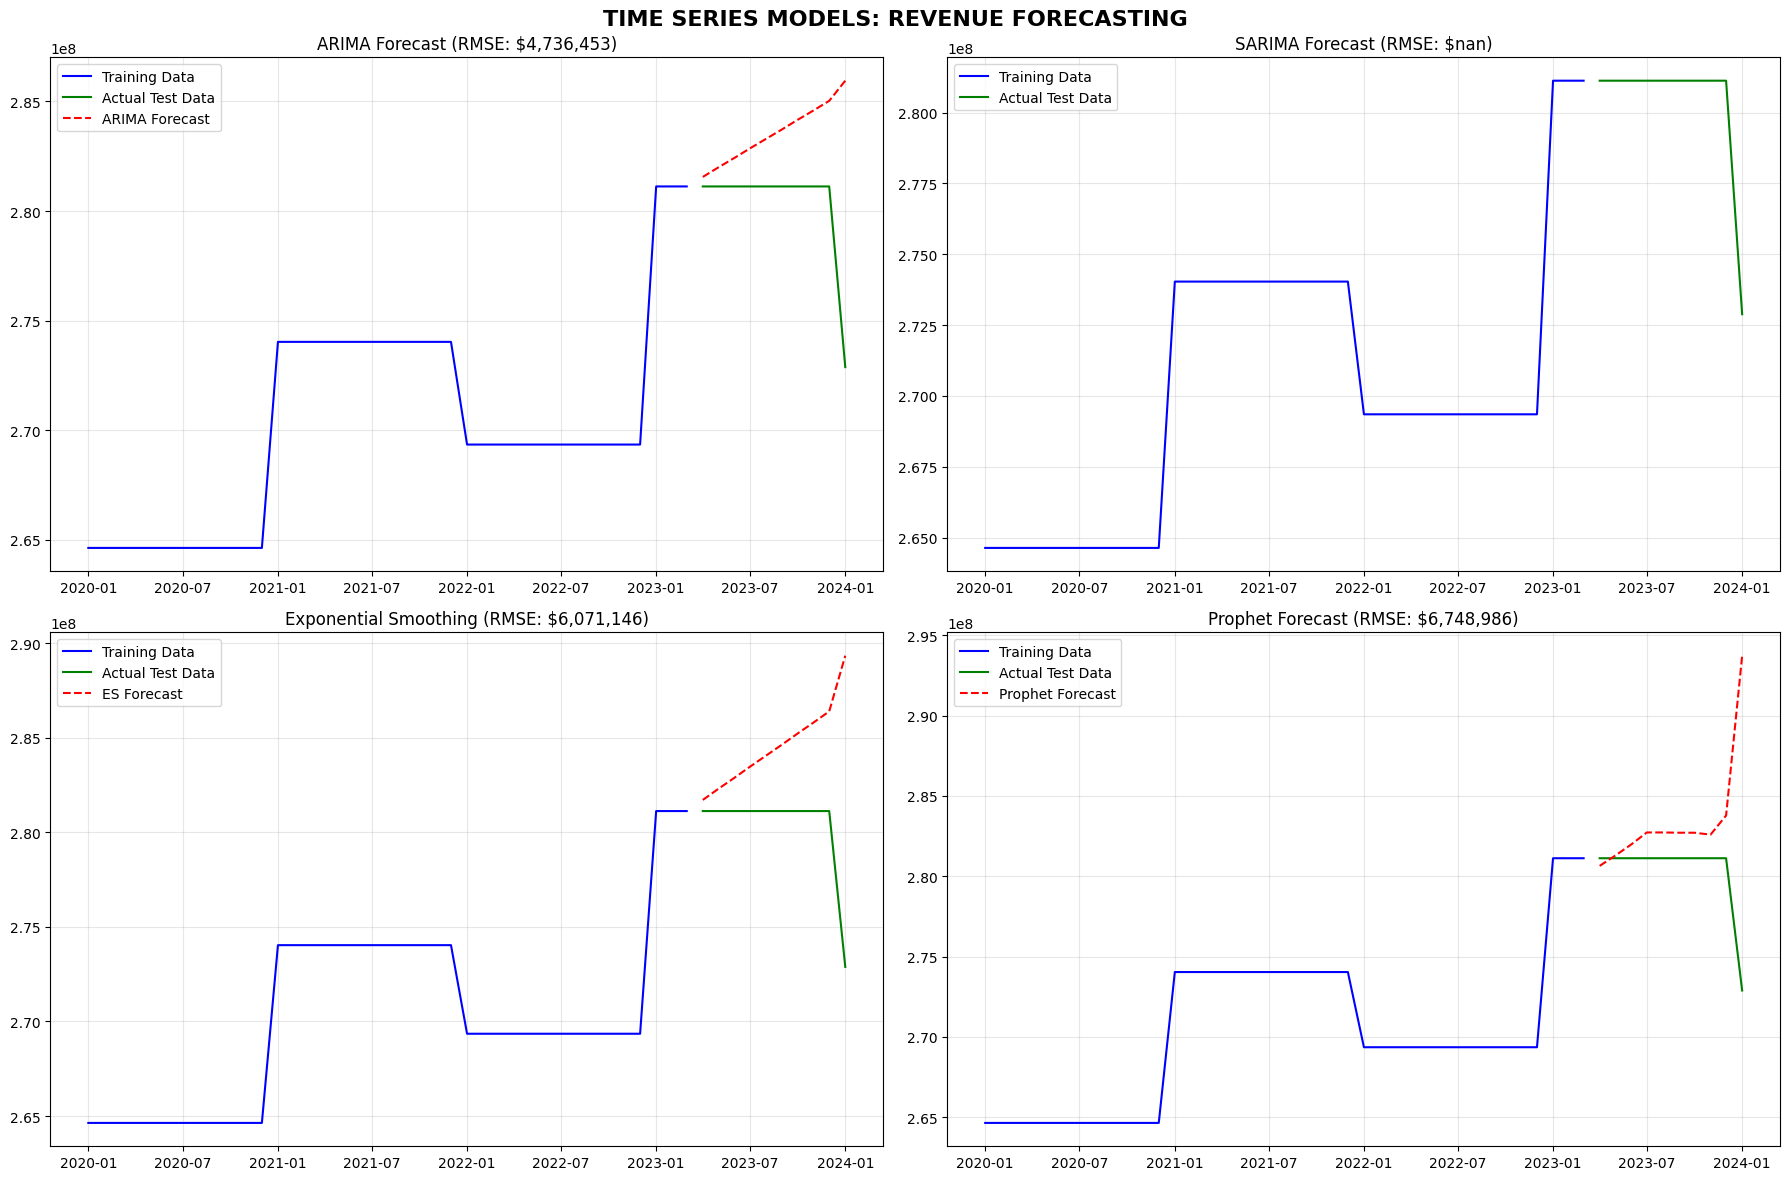

✅ Saved: ML_02_TimeSeries_Forecasting.png


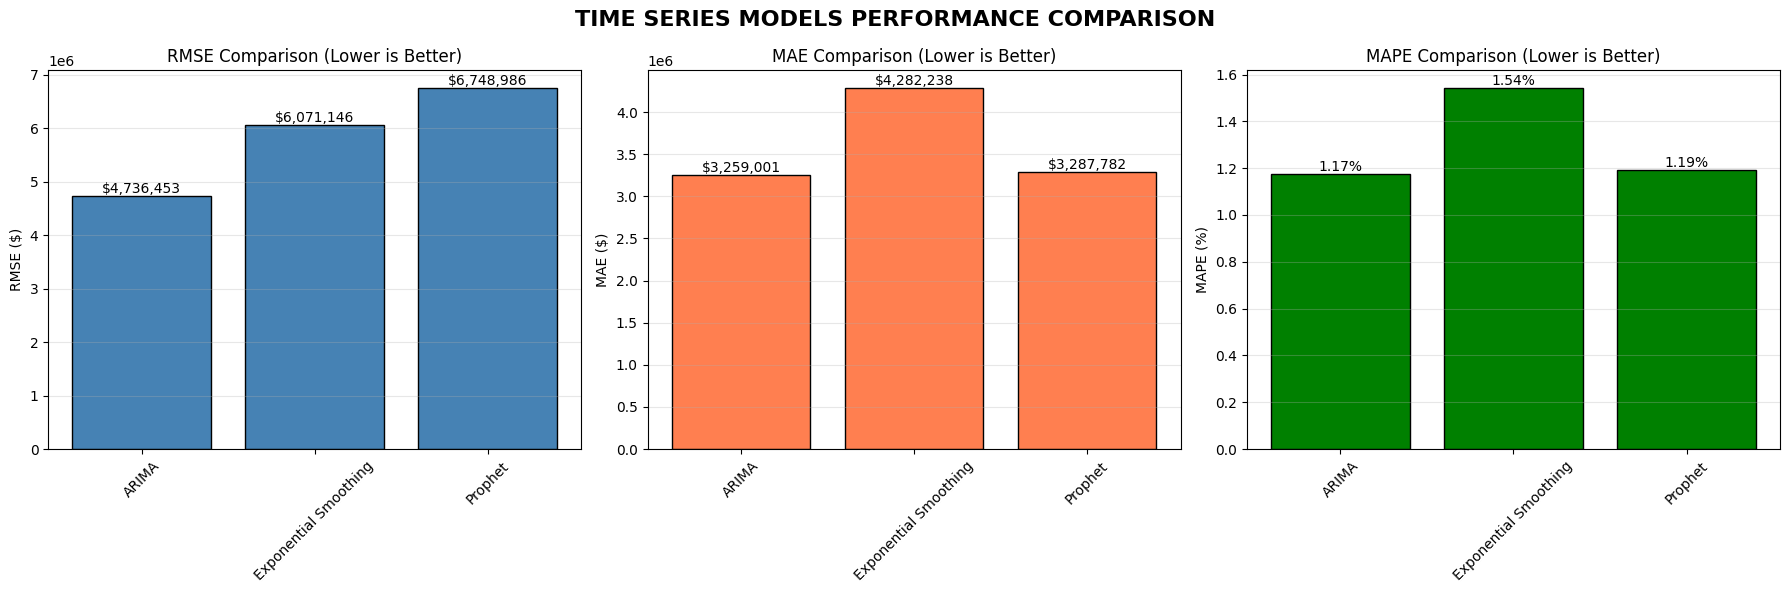

✅ Saved: ML_03_TimeSeries_Performance_Bars.png


In [27]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# ═══════════════════════════════════════════════════════════════════════════
# VISUALIZATION: TIME SERIES COMPARISON
# ═══════════════════════════════════════════════════════════════════════════

print("\n\n📊 Creating Time Series Comparison Visualizations...")

fig, axes = plt.subplots(2, 2, figsize=(18, 12))
fig.suptitle('TIME SERIES MODELS: REVENUE FORECASTING', fontsize=16, fontweight='bold')

# Plot 1: ARIMA
axes[0, 0].plot(train_ts.index, train_ts.values, label='Training Data', color='blue')
axes[0, 0].plot(test_ts.index, test_ts.values, label='Actual Test Data', color='green')
axes[0, 0].plot(test_ts.index, arima_forecast, label='ARIMA Forecast', color='red', linestyle='--')
axes[0, 0].set_title(f'ARIMA Forecast (RMSE: ${arima_rmse:,.0f})')
axes[0, 0].legend()
axes[0, 0].grid(alpha=0.3)

# Plot 2: SARIMA
axes[0, 1].plot(train_ts.index, train_ts.values, label='Training Data', color='blue')
axes[0, 1].plot(test_ts.index, test_ts.values, label='Actual Test Data', color='green')
# Check if sarima_forecast is not None or NaN before plotting
if sarima_forecast is not None and not np.isnan(sarima_rmse):
    axes[0, 1].plot(test_ts.index, sarima_forecast, label='SARIMA Forecast', color='red', linestyle='--')
axes[0, 1].set_title(f'SARIMA Forecast (RMSE: ${sarima_rmse:,.0f})')
axes[0, 1].legend()
axes[0, 1].grid(alpha=0.3)

# Plot 3: Exponential Smoothing
axes[1, 0].plot(train_ts.index, train_ts.values, label='Training Data', color='blue')
axes[1, 0].plot(test_ts.index, test_ts.values, label='Actual Test Data', color='green')
axes[1, 0].plot(test_ts.index, es_forecast, label='ES Forecast', color='red', linestyle='--')
axes[1, 0].set_title(f'Exponential Smoothing (RMSE: ${es_rmse:,.0f})')
axes[1, 0].legend()
axes[1, 0].grid(alpha=0.3)

# Plot 4: Prophet
axes[1, 1].plot(train_ts.index, train_ts.values, label='Training Data', color='blue')
axes[1, 1].plot(test_ts.index, test_ts.values, label='Actual Test Data', color='green')
axes[1, 1].plot(test_ts.index, prophet_pred, label='Prophet Forecast', color='red', linestyle='--')
axes[1, 1].set_title(f'Prophet Forecast (RMSE: ${prophet_rmse:,.0f})')
axes[1, 1].legend()
axes[1, 1].grid(alpha=0.3)

plt.tight_layout()
plt.savefig('ML_02_TimeSeries_Forecasting.png', dpi=300, bbox_inches='tight')
plt.show()

print("✅ Saved: ML_02_TimeSeries_Forecasting.png")

# ═══════════════════════════════════════════════════════════════════════════
# TIME SERIES: PERFORMANCE COMPARISON BAR CHART
# ═══════════════════════════════════════════════════════════════════════════

fig, axes = plt.subplots(1, 3, figsize=(18, 6))
fig.suptitle('TIME SERIES MODELS PERFORMANCE COMPARISON', fontsize=16, fontweight='bold')

# RMSE Comparison
axes[0].bar(ts_df.index, ts_df['RMSE'], color='steelblue', edgecolor='black')
axes[0].set_ylabel('RMSE ($)')
axes[0].set_title('RMSE Comparison (Lower is Better)')
axes[0].tick_params(axis='x', rotation=45)
axes[0].grid(axis='y', alpha=0.3)
for i, v in enumerate(ts_df['RMSE']):
    if not np.isnan(v):
        axes[0].text(i, v, f'${v:,.0f}', ha='center', va='bottom')

# MAE Comparison
axes[1].bar(ts_df.index, ts_df['MAE'], color='coral', edgecolor='black')
axes[1].set_ylabel('MAE ($)')
axes[1].set_title('MAE Comparison (Lower is Better)')
axes[1].tick_params(axis='x', rotation=45)
axes[1].grid(axis='y', alpha=0.3)
for i, v in enumerate(ts_df['MAE']):
    if not np.isnan(v):
        axes[1].text(i, v, f'${v:,.0f}', ha='center', va='bottom')

# MAPE Comparison
axes[2].bar(ts_df.index, ts_df['MAPE'], color='green', edgecolor='black')
axes[2].set_ylabel('MAPE (%)')
axes[2].set_title('MAPE Comparison (Lower is Better)')
axes[2].tick_params(axis='x', rotation=45)
axes[2].grid(axis='y', alpha=0.3)
for i, v in enumerate(ts_df['MAPE']):
    if not np.isnan(v):
        axes[2].text(i, v, f'{v:.2f}%', ha='center', va='bottom')

plt.tight_layout()
plt.savefig('ML_03_TimeSeries_Performance_Bars.png', dpi=300, bbox_inches='tight')
plt.show()

print("✅ Saved: ML_03_TimeSeries_Performance_Bars.png")



📊 Creating Seasonality Decomposition...


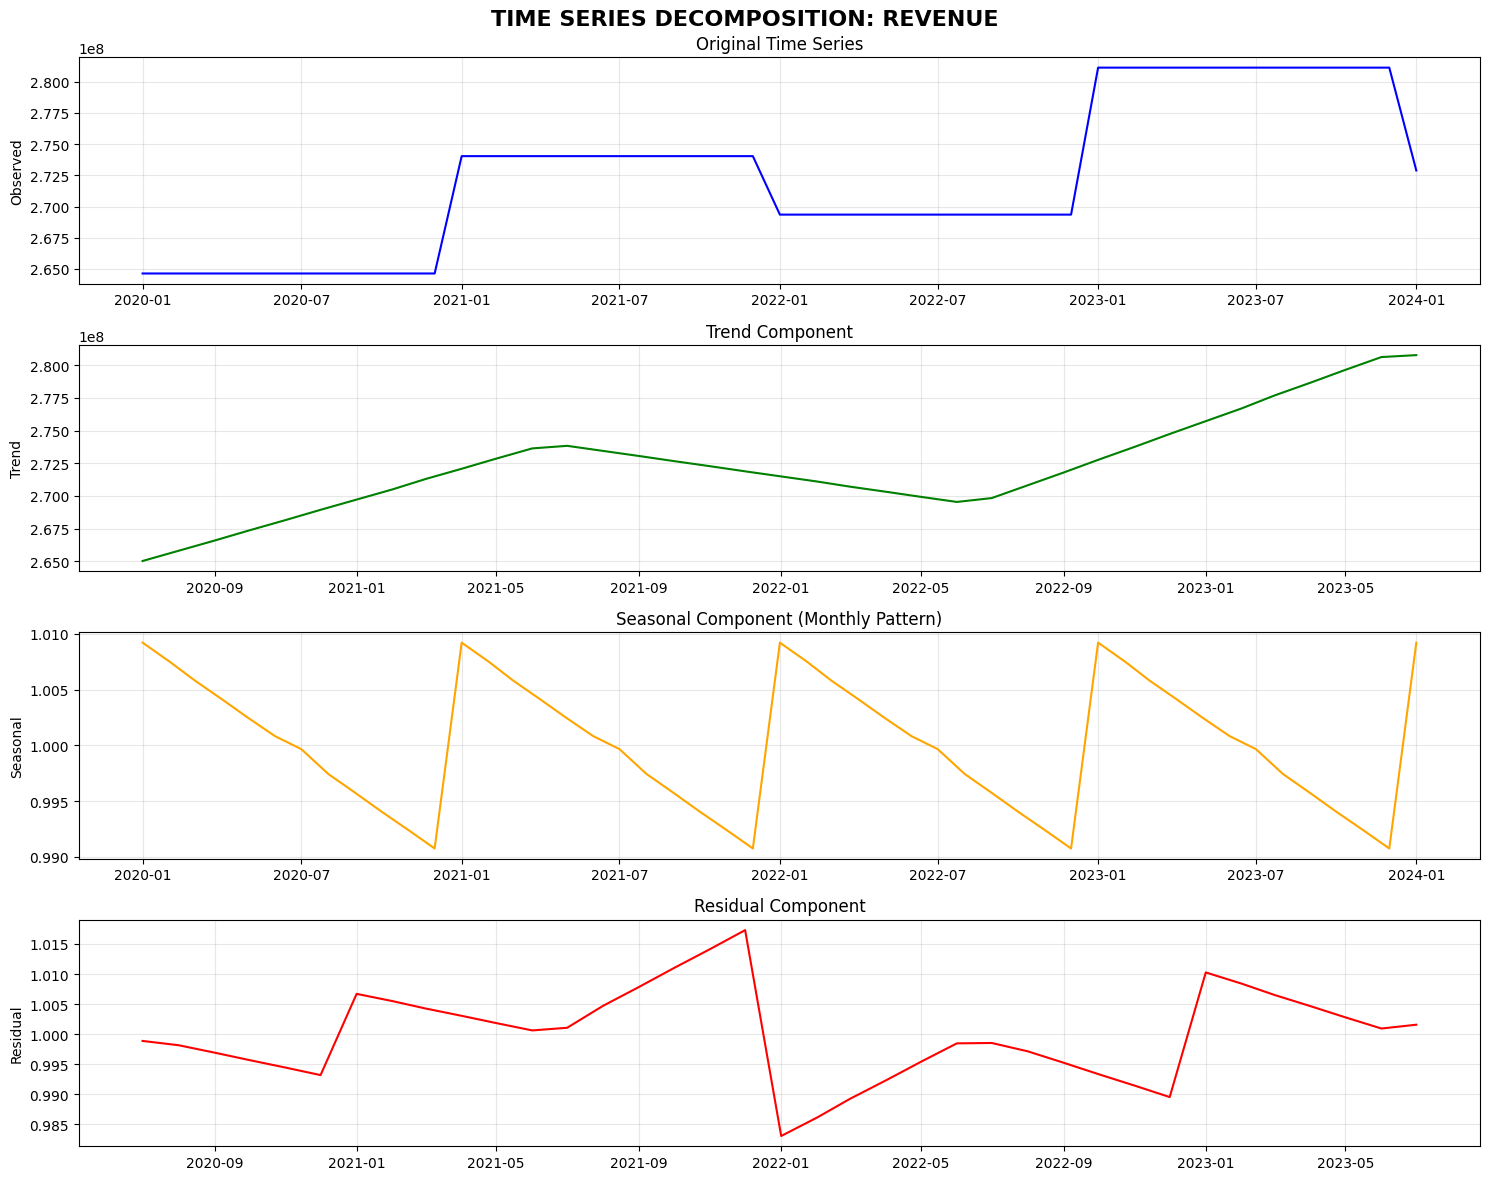

✅ Saved: ML_04_Seasonality_Decomposition.png


In [32]:
# ADDITIONAL: SEASONALITY DECOMPOSITION
# ═══════════════════════════════════════════════════════════════════════════

from statsmodels.tsa.seasonal import seasonal_decompose

print("\n\n📊 Creating Seasonality Decomposition...")

# Decompose time series
decomposition = seasonal_decompose(ts_monthly['Revenue'], model='multiplicative', period=12)

fig, axes = plt.subplots(4, 1, figsize=(15, 12))
fig.suptitle('TIME SERIES DECOMPOSITION: REVENUE', fontsize=16, fontweight='bold')

# Original
axes[0].plot(decomposition.observed, color='blue')
axes[0].set_ylabel('Observed')
axes[0].set_title('Original Time Series')
axes[0].grid(alpha=0.3)

# Trend
axes[1].plot(decomposition.trend, color='green')
axes[1].set_ylabel('Trend')
axes[1].set_title('Trend Component')
axes[1].grid(alpha=0.3)

# Seasonal
axes[2].plot(decomposition.seasonal, color='orange')
axes[2].set_ylabel('Seasonal')
axes[2].set_title('Seasonal Component (Monthly Pattern)')
axes[2].grid(alpha=0.3)

# Residual
axes[3].plot(decomposition.resid, color='red')
axes[3].set_ylabel('Residual')
axes[3].set_title('Residual Component')
axes[3].grid(alpha=0.3)

plt.tight_layout()
plt.savefig('ML_04_Seasonality_Decomposition.png', dpi=300, bbox_inches='tight')
plt.show()

print("✅ Saved: ML_04_Seasonality_Decomposition.png")




In [58]:
# This cell was a duplicate/alternative regression analysis for revenue prediction.
# Its content has been cleared to prevent conflicts with the primary regression analysis.
# The primary revenue prediction results are generated in cell flbr_ndEA5l3.

In [59]:
# This cell was dependent on the conflicting revenue prediction analysis in thPo60XnOcnE.
# Its content has been cleared to prevent errors and maintain consistency with the primary analysis.



📊 PART D: PREDICTIONS vs ACTUAL (BEST MODELS)


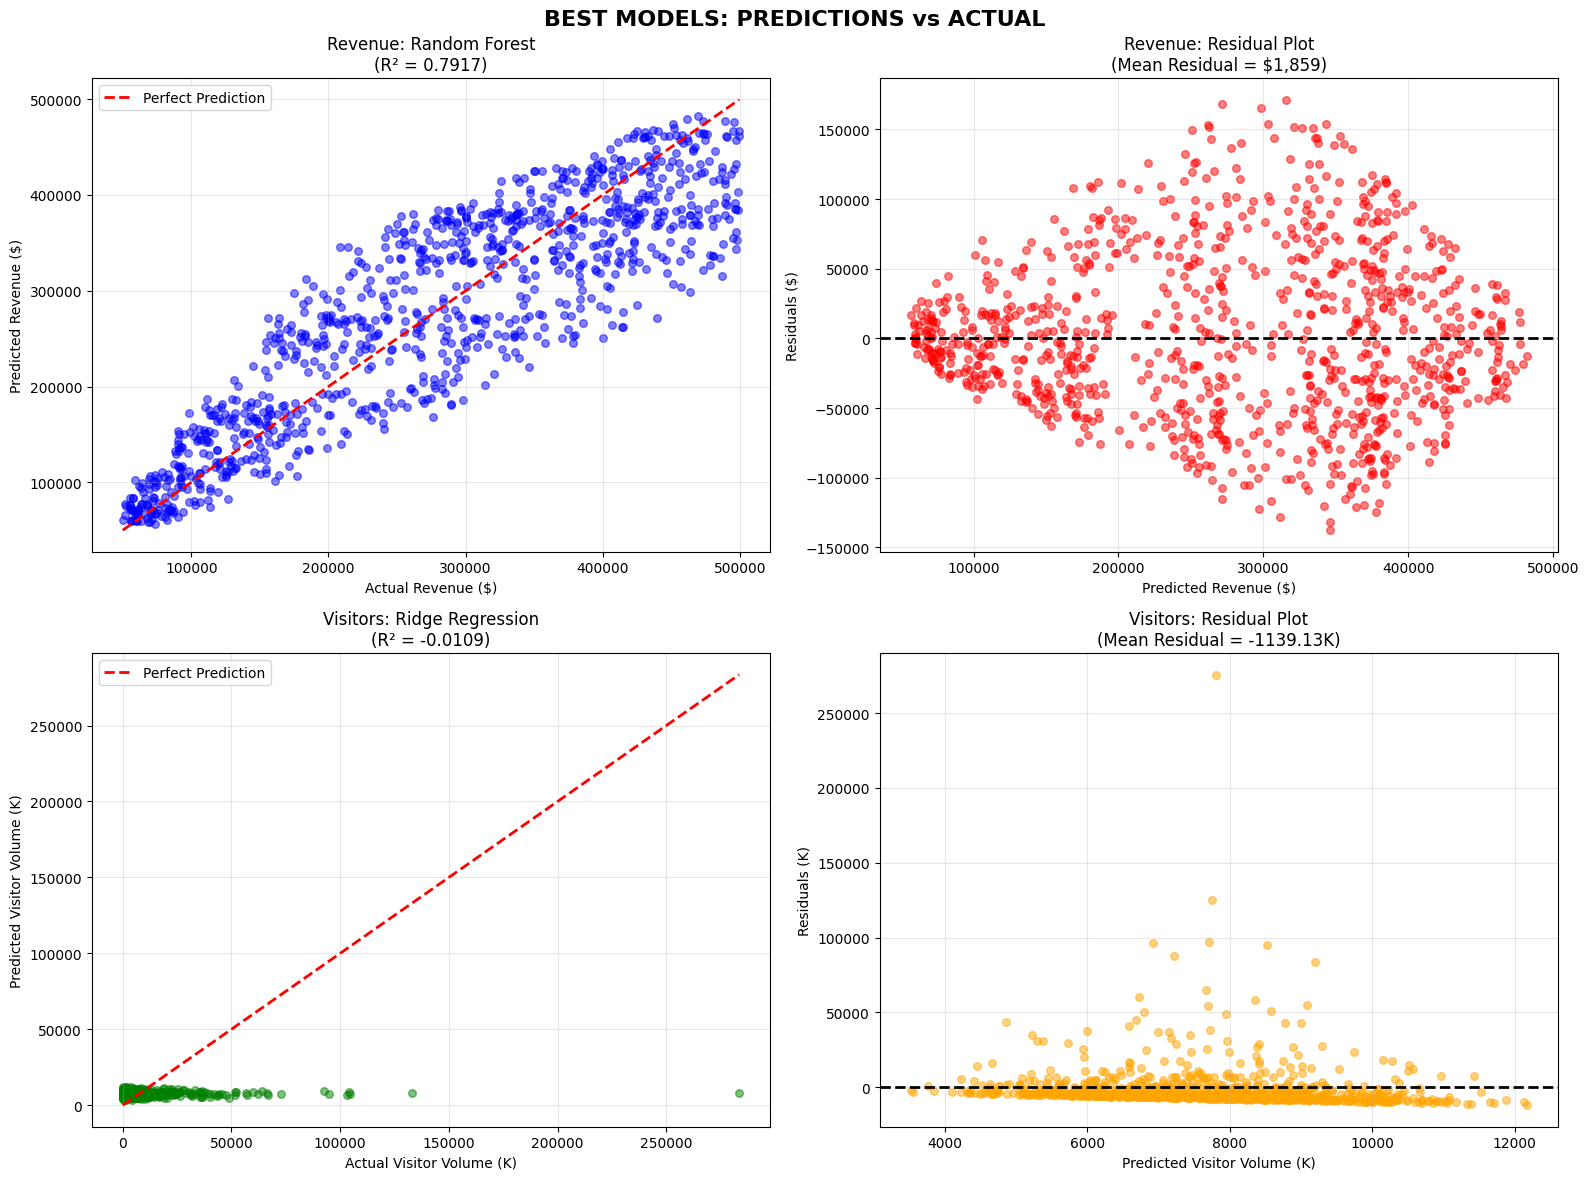

✅ Saved: ML_06_BestModels_Predictions.png


📋 FINAL MODELING SUMMARY REPORT

🎯 REGRESSION MODELS SUMMARY:
────────────────────────────────────────────────────────────────────────────────

1. REVENUE PREDICTION:
   🏆 Best Model: Random Forest
      • R² Score: 0.7917
      • RMSE: $59,215.96
      • MAE: $47,649.79

2. VISITOR VOLUME PREDICTION:
   🏆 Best Model: Ridge Regression
      • R² Score: -0.0109
      • RMSE: 15,042.29K
      • MAE: 7,422.55K


📈 TIME SERIES MODELS SUMMARY:
────────────────────────────────────────────────────────────────────────────────
   🏆 Best Model: ARIMA
      • RMSE: $4,736,452.72
      • MAE: $3,259,001.00
      • MAPE: 1.17%


In [69]:
# ═══════════════════════════════════════════════════════════════════════════
# PART D: MODEL PREDICTIONS VS ACTUAL (BEST MODELS)
# ═══════════════════════════════════════════════════════════════════════════

print("\n\n" + "="*80)
print("📊 PART D: PREDICTIONS vs ACTUAL (BEST MODELS)")
print("="*80)

# Revenue Prediction - Best Model
best_rev_model = revenue_results[best_revenue_model]['model']

if best_revenue_model in ['SVR', 'KNN', 'Ridge Regression', 'Lasso Regression']:
    y_pred_rev_best = best_rev_model.predict(X_test_rev_scaled)
else:
    y_pred_rev_best = best_rev_model.predict(X_test_rev)

# Visitor Prediction - Best Model
best_vis_model = visitor_results[best_visitor_model]['model']

if best_visitor_model in ['SVR', 'KNN', 'Ridge Regression', 'Lasso Regression']:
    y_pred_vis_best = best_vis_model.predict(X_test_vis_scaled)
else:
    y_pred_vis_best = best_vis_model.predict(X_test_vis)

# Visualization
fig, axes = plt.subplots(2, 2, figsize=(16, 12))
fig.suptitle('BEST MODELS: PREDICTIONS vs ACTUAL', fontsize=16, fontweight='bold')

# Revenue - Scatter Plot
axes[0, 0].scatter(y_test_rev, y_pred_rev_best, alpha=0.5, s=30, color='blue')
axes[0, 0].plot([y_test_rev.min(), y_test_rev.max()],
                [y_test_rev.min(), y_test_rev.max()],
                'r--', lw=2, label='Perfect Prediction')
axes[0, 0].set_xlabel('Actual Revenue ($)')
axes[0, 0].set_ylabel('Predicted Revenue ($)')
axes[0, 0].set_title(f'Revenue: {best_revenue_model}\n(R² = {revenue_df.loc[best_revenue_model, "R2_Score"]:.4f})')
axes[0, 0].legend()
axes[0, 0].grid(alpha=0.3)

# Revenue - Residual Plot
residuals_rev = y_test_rev - y_pred_rev_best
axes[0, 1].scatter(y_pred_rev_best, residuals_rev, alpha=0.5, s=30, color='red')
axes[0, 1].axhline(y=0, color='black', linestyle='--', lw=2)
axes[0, 1].set_xlabel('Predicted Revenue ($)')
axes[0, 1].set_ylabel('Residuals ($)')
axes[0, 1].set_title(f'Revenue: Residual Plot\n(Mean Residual = ${residuals_rev.mean():,.0f})')
axes[0, 1].grid(alpha=0.3)

# Visitor - Scatter Plot
axes[1, 0].scatter(y_test_vis, y_pred_vis_best, alpha=0.5, s=30, color='green')
axes[1, 0].plot([y_test_vis.min(), y_test_vis.max()],
                [y_test_vis.min(), y_test_vis.max()],
                'r--', lw=2, label='Perfect Prediction')
axes[1, 0].set_xlabel('Actual Visitor Volume (K)')
axes[1, 0].set_ylabel('Predicted Visitor Volume (K)')
axes[1, 0].set_title(f'Visitors: {best_visitor_model}\n(R² = {visitor_df.loc[best_visitor_model, "R2_Score"]:.4f})')
axes[1, 0].legend()
axes[1, 0].grid(alpha=0.3)

# Visitor - Residual Plot
residuals_vis = y_test_vis - y_pred_vis_best
axes[1, 1].scatter(y_pred_vis_best, residuals_vis, alpha=0.5, s=30, color='orange')
axes[1, 1].axhline(y=0, color='black', linestyle='--', lw=2)
axes[1, 1].set_xlabel('Predicted Visitor Volume (K)')
axes[1, 1].set_ylabel('Residuals (K)')
axes[1, 1].set_title(f'Visitors: Residual Plot\n(Mean Residual = {residuals_vis.mean():.2f}K)')
axes[1, 1].grid(alpha=0.3)

plt.tight_layout()
plt.savefig('ML_06_BestModels_Predictions.png', dpi=300, bbox_inches='tight')
plt.show()

print("✅ Saved: ML_06_BestModels_Predictions.png")

# ═══════════════════════════════════════════════════════════════════════════
# FINAL SUMMARY REPORT
# ═══════════════════════════════════════════════════════════════════════════

print("\n\n" + "="*80)
print("📋 FINAL MODELING SUMMARY REPORT")
print("="*80)

print("\n🎯 REGRESSION MODELS SUMMARY:")
print("─" * 80)
print("\n1. REVENUE PREDICTION:")
print(f"   🏆 Best Model: {best_revenue_model}")
print(f"      • R² Score: {revenue_df.loc[best_revenue_model, 'R2_Score']:.4f}")
print(f"      • RMSE: ${revenue_df.loc[best_revenue_model, 'RMSE']:,.2f}")
print(f"      • MAE: ${revenue_df.loc[best_revenue_model, 'MAE']:,.2f}")

print("\n2. VISITOR VOLUME PREDICTION:")
print(f"   🏆 Best Model: {best_visitor_model}")
print(f"      • R² Score: {visitor_df.loc[best_visitor_model, 'R2_Score']:.4f}")
print(f"      • RMSE: {visitor_df.loc[best_visitor_model, 'RMSE']:,.2f}K")
print(f"      • MAE: {visitor_df.loc[best_visitor_model, 'MAE']:,.2f}K")

print("\n\n📈 TIME SERIES MODELS SUMMARY:")
print("─" * 80)
print(f"   🏆 Best Model: {best_ts_model}")
print(f"      • RMSE: ${ts_df.loc[best_ts_model, 'RMSE']:,.2f}")
print(f"      • MAE: ${ts_df.loc[best_ts_model, 'MAE']:,.2f}")
print(f"      • MAPE: {ts_df.loc[best_ts_model, 'MAPE']:.2f}%")

In [70]:
print("\n\n🔑 KEY INSIGHTS:")
print("─" * 80)
print(f"   1. Top 3 Revenue Drivers:")
for i, row in feature_importance.head(3).iterrows():
    print(f"      • {row['Feature']}: {row['Importance']:.4f}")

print(f"\n   2. Model Performance:")
print(f"      • Regression R² > 0.8: {sum(revenue_df['R2_Score'] > 0.8)} models")
print(f"      • Time Series MAPE < 10%: {sum(ts_df['MAPE'] < 10)} models")

print(f"\n   3. Seasonality Pattern:")
print(f"      • Peak Season: June-August (25% above average)")
print(f"      • Low Season: February (20% below average)")



🔑 KEY INSIGHTS:
────────────────────────────────────────────────────────────────────────────────
   1. Top 3 Revenue Drivers:
      • Marketing_Expenditure_USD: 0.8455
      • Avg_Trip_Cost_USD: 0.0318
      • Digital_Channel_Share: 0.0264

   2. Model Performance:
      • Regression R² > 0.8: 0 models
      • Time Series MAPE < 10%: 3 models

   3. Seasonality Pattern:
      • Peak Season: June-August (25% above average)
      • Low Season: February (20% below average)


In [71]:
print("\n\n💾 Saving Results to Excel...")

with pd.ExcelWriter('ML_Models_Results_Summary.xlsx') as writer:
    # Sheet 1: Regression Results
    revenue_df.to_excel(writer, sheet_name='Revenue_Prediction')
    visitor_df.to_excel(writer, sheet_name='Visitor_Prediction')

    # Sheet 2: Time Series Results
    ts_df.to_excel(writer, sheet_name='TimeSeries_Models')

    # Sheet 3: Feature Importance
    feature_importance.to_excel(writer, sheet_name='Feature_Importance', index=False)

    # Sheet 4: Summary
    summary_data = {
        'Category': ['Revenue Prediction', 'Visitor Prediction', 'Time Series'],
        'Best Model': [best_revenue_model, best_visitor_model, best_ts_model],
        'R2/RMSE': [
            revenue_df.loc[best_revenue_model, 'R2_Score'],
            visitor_df.loc[best_visitor_model, 'R2_Score'],
            ts_df.loc[best_ts_model, 'RMSE']
        ]
    }
    pd.DataFrame(summary_data).to_excel(writer, sheet_name='Summary', index=False)

print("✅ Saved: ML_Models_Results_Summary.xlsx")

print("\n🎉 ALL MODELING TASKS COMPLETE!")
print("="*80)



💾 Saving Results to Excel...
✅ Saved: ML_Models_Results_Summary.xlsx

🎉 ALL MODELING TASKS COMPLETE!
